# Linear Regression model for House Pricing analysis

## Importing Libraries

In [23]:
import numpy as np 
import pandas as pd

import sklearn
from sklearn import linear_model
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

## Dataset

In [7]:
dataset = fetch_california_housing()
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [16]:
X_df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
X_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [17]:
y_df = pd.DataFrame(dataset['target'], columns=dataset['target_names'])
y_df

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


## Data Exploration

<Axes: >

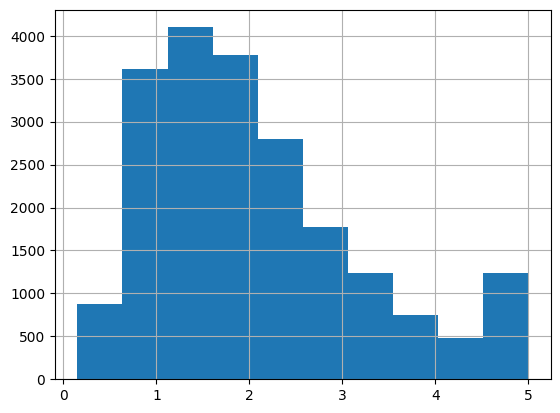

In [27]:
y_df.MedHouseVal.hist()

In [20]:
X_df.HouseAge.value_counts()

HouseAge
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: count, dtype: int64

## Pre-Processing

In [22]:
X = X_df.to_numpy()
y = y_df.to_numpy()

print("X")
print(X)

print()

print("y")
print(y)

X
[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]

y
[[4.526]
 [3.585]
 [3.521]
 ...
 [0.923]
 [0.847]
 [0.894]]


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train

array([[   0.9809    ,   19.        ,    3.18772563, ...,    2.62093863,
          33.98      , -118.28      ],
       [   4.2232    ,   33.        ,    6.18969555, ...,    2.37704918,
          37.46      , -122.23      ],
       [   3.5488    ,   42.        ,    4.82157676, ...,    4.33195021,
          33.79      , -118.26      ],
       ...,
       [   2.9344    ,   36.        ,    3.98671727, ...,    3.33206831,
          34.03      , -118.38      ],
       [   5.7192    ,   15.        ,    6.39534884, ...,    3.17889088,
          37.58      , -121.96      ],
       [   2.5755    ,   52.        ,    3.40257649, ...,    2.10869565,
          37.77      , -122.42      ]])

## Model

In [36]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

w = reg.coef_
b = reg.intercept_

print("Weight (w):", w)
print()
print("Bias (b)", b)

Weight (w): [[ 4.44870466e-01  9.55004561e-03 -1.21991503e-01  7.79144696e-01
  -7.68990809e-08 -3.29948505e-03 -4.19131153e-01 -4.34103468e-01]]

Bias (b) [-37.08201094]


## Results

Explanation of manual pred

x =[1, 2, 3, 4]

w = [2, 2, 2, 2]
b = 1

y = w*x + b

w*x = [2, 4, 6, 8] =   2 + 4 + 6 + 8 = 20

w*x + b = 20 + 1 = 21

In [43]:
# Manually doing prediction
x_ = [[i for i in range(8)]]
y_pred = np.sum(w * x_) + b
print("manual pred", y_pred)

y_pred_sk = reg.predict(x_)
print("sklearn pred", y_pred_sk)

manual pred [-40.54901874]
sklearn pred [[-40.54901874]]


## Exporting Model

In [55]:
import pickle

def to_pickle(obj, filepath):
    # You need to actually write the pickle data to the file
    with open(filepath, "wb") as f:
        pickle.dump(obj, f)  # Use dump() to write obj to file, not dumps()
    print("Successfully added file to", filepath)

def load_pickle(filepath):
    obj = None
    # Change mode from "wb" (write binary) to "rb" (read binary)
    with open(filepath, "rb") as f:
        obj = pickle.load(f)  # Use load() to read the pickle data from the file, not loads()
    
    return obj

In [56]:
filepath = 'model_weights/house_price_reg.pkl'

In [57]:
to_pickle(reg, filepath)

Successfully added file to model_weights/house_price_reg.pkl


In [63]:
loaded_reg = load_pickle(filepath)
print(loaded_reg)
print()
print("loaded intercept")
print(loaded_reg.intercept_)

print("actual intercept")
print(reg.intercept_)

LinearRegression()

loaded intercept
[-37.08201094]
actual intercept
[-37.08201094]


## Inference

In [66]:
import pickle

class HousePriceRegressionModel:
    """Class which will hold the House Price Model
    Args:
        path_to_weights (str): Path to the pickled weights
        
    Methods:
        predict(x): Apply model and return prediction of price

    """
    def __init__(self, path_to_weights) -> None:
        self.model = self.load_pickle(path_to_weights)

    def predict(self, x):
        y_pred = self.model.predict(x)
        return y_pred
    
    def load_pickle(self, filepath):
        obj = None
        # Change mode from "wb" (write binary) to "rb" (read binary)
        with open(filepath, "rb") as f:
            obj = pickle.load(f)  # Use load() to read the pickle data from the file, not loads()
        
        return obj

In [70]:
# How to call in backend 
reg_model = HousePriceRegressionModel(filepath)
some_input = [[i for i in range(8)]]
some_pred = reg_model.predict(some_input)

print(some_pred)

[[-40.54901874]]
